In [ ]:
# This notebook predicts if a passenger will survive

# Referred to randerson112358's notebook

In [136]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [111]:
#Load the data
titanic = sns.load_dataset('titanic')
#Print the first 10 rows of data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [112]:
#Count the number of rows and columns in the data set 
titanic.shape

(891, 15)

In [113]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [169]:
#Get a count of the number of survivors  
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

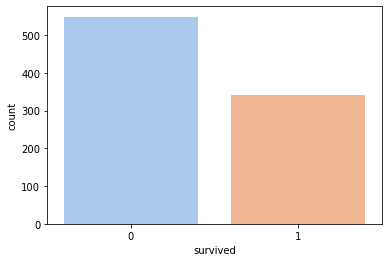

In [170]:
#Visualizing the count of number of survivors
sns.countplot(titanic['survived'], label="Count")

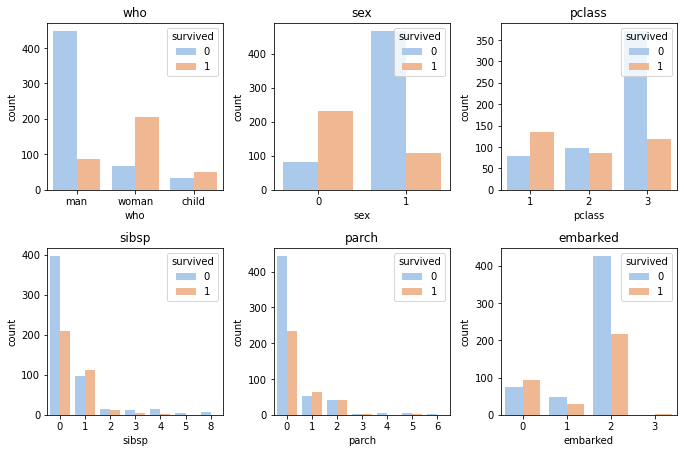

In [167]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(titanic[cols[i]], hue=titanic["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout


In [90]:
#Look at survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [91]:
#Look at survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='sex'>

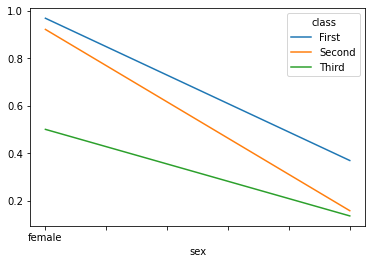

In [93]:
#Look at survival rate by sex and class visually
titanic.pivot_table('survived', index='sex', columns='class').plot()

<AxesSubplot:xlabel='class', ylabel='survived'>

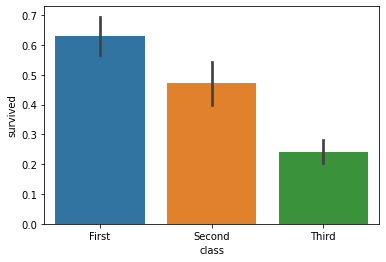

In [92]:
#Plot the survival rate of each class.
sns.barplot(x='class', y='survived', data=titanic)

In [94]:
#Look at survival rate by sex, age and class
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [ ]:
plt.figure(figsize=(6,2))
sns.catplot(data=df_train,x='Pclass',y='Age',kind='box',col='Sex',row='Survived', palette="RdBu")

In [101]:
#Count the empty (NaN, NAN, na) values in each column 
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [102]:
#Look at all of the values in each column & get a count 
for val in titanic:
   print(titanic[val].value_counts())
   print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

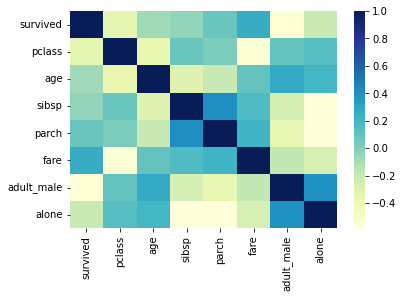

In [116]:
import seaborn as sns

sns.heatmap(titanic.corr(), cmap="YlGnBu")
plt.show()

In [8]:
Titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

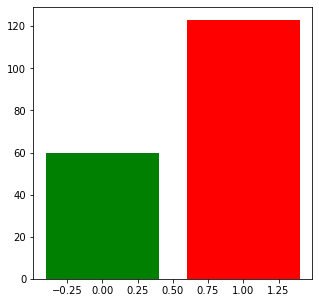

In [81]:
#Vitualisation of the Survived 
plt.figure(figsize=(5,5))
plt.bar(list(Titanic_train['Survived']. value_counts().keys()),list(Titanic_train['Survived'].value_counts()),color=["r","g"])
plt.show()

In [11]:
Titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

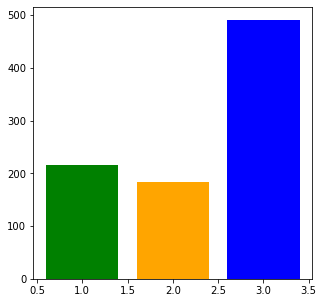

In [11]:
plt.figure(figsize=(5,5))
plt.bar(list(Titanic_train['Pclass'].value_counts().keys()),list(Titanic_train['Pclass'].value_counts()),color=["blue","green","orange"])
plt.show()

In [138]:
Titanic_train ['Sex'].value_counts

<bound method IndexOpsMixin.value_counts of 1      female
3      female
6        male
10     female
11     female
        ...  
871    female
872      male
879    female
887    female
889      male
Name: Sex, Length: 183, dtype: object>

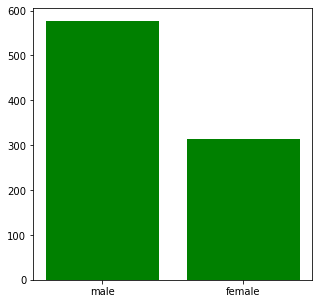

In [13]:
plt.figure(figsize=(5,5))
plt.bar(list(Titanic_train['Sex'].value_counts().keys()),list(Titanic_train['Sex'].value_counts()),color="Green")
plt.show()

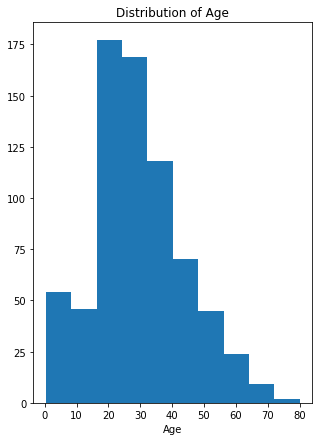

In [16]:
plt.figure(figsize=(5,7))
plt.hist(Titanic_train['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

In [18]:
sum(Titanic_train['Survived'].isnull())

0

In [21]:
sum(Titanic_train['Age'].isnull())

0

In [20]:
Titanic_train=Titanic_train.dropna()

In [ ]:
#building  model

In [24]:
sum(Titanic_train['Survived'].isnull())

0

In [22]:
sum(Titanic_train['Age'].isnull())

0

In [ ]:
x_train=Titanic_train['Age']
y_train=Titanic_train['Survived']


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtc = DecisionTreeClassifier()

In [ ]:
#predicting values

In [117]:
sum(Titanic_test['Age'].isnull())

0

In [36]:
Titanic_test=Titanic_test.dropna()

In [37]:
sum(Titanic_test['Age'].isnull())

0

In [118]:
Titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [141]:
Titanic_train['Name'].map(lambda row: row.split(',')[1].split('.')[0])

1        Mrs
3        Mrs
6         Mr
10      Miss
11      Miss
       ...  
871      Mrs
872       Mr
879      Mrs
887     Miss
889       Mr
Name: Name, Length: 183, dtype: object

In [142]:
Titanic_train['Name'].map(lambda row: row.split(',')[1].split('.')[0]).value_counts()

 Mr              81
 Miss            44
 Mrs             38
 Master           7
 Dr               3
 Major            2
 Mlle             2
 Mme              1
 Lady             1
 Sir              1
 Col              1
 Capt             1
 the Countess     1
Name: Name, dtype: int64

In [144]:
# Data visualisation to see the number of status

status=Titanic_train['Name'].map(lambda row: row.split(',')[1].split('.')[0]).value_counts()

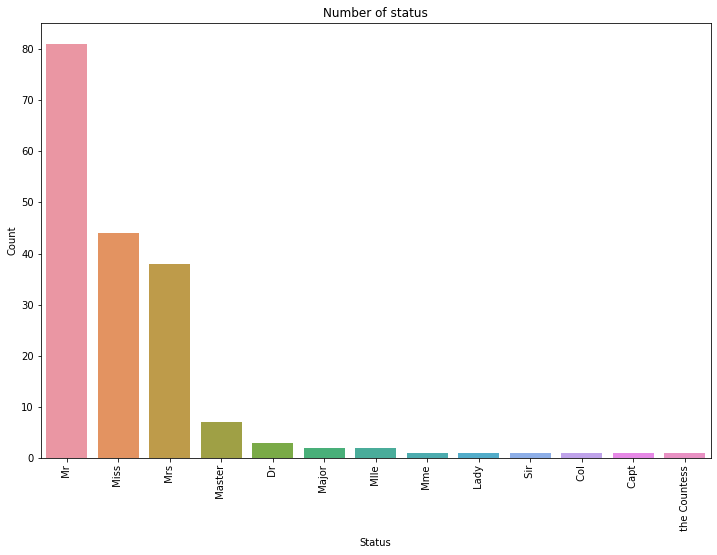

In [145]:
plt.figure(figsize=(12, 8))
sns.barplot(x=status.index, y=status.values)
plt.title('Number of status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [146]:
Titanic_train['Age'].value_counts()

36.0    11
24.0     9
19.0     6
35.0     6
31.0     5
        ..
71.0     1
3.0      1
1.0      1
36.5     1
26.0     1
Name: Age, Length: 63, dtype: int64

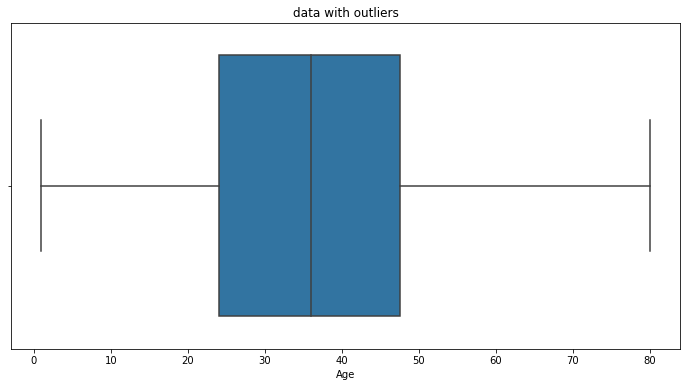

In [148]:
plt.figure(figsize=(12,6))
sns.boxplot(Titanic_train['Age'])
plt.title('data with outliers')
plt.show()

In [149]:
Titanic_train['Age'].describe()

count    183.000000
mean      35.674426
std       15.643866
min        0.920000
25%       24.000000
50%       36.000000
75%       47.500000
max       80.000000
Name: Age, dtype: float64

In [150]:
Titanic_train['Age'].median()

36.0

In [151]:
def out_bound(Titanic_train, col):
    Q1=Titanic_train[col].quantile(0.25)
    Q3=Titanic_train[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    return lower_bound, upper_bound

In [152]:
print(out_bound(Titanic_train, 'Age'))

(-11.25, 82.75)


In [153]:
#Remove outliers
def remove_outliers(data, col):
    l_b, u_b=out_bound(data, col)
    
    return data[ (data[col]>l_b) & (data[col]<u_b) ]

In [154]:
data1=remove_outliers(Titanic_train, 'Age')

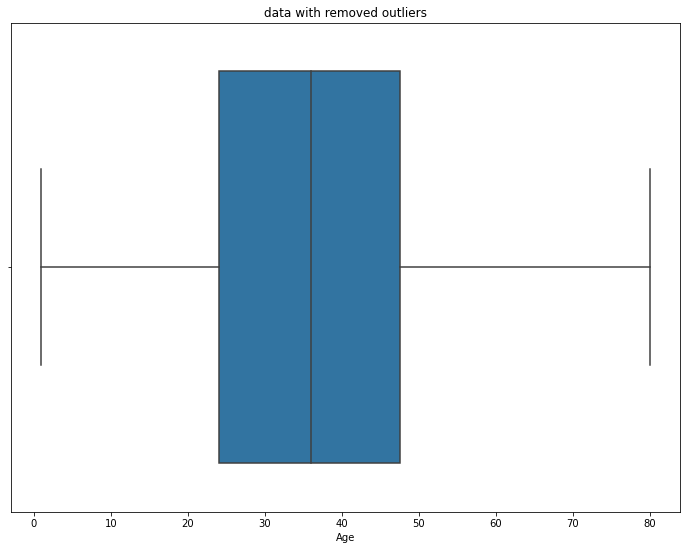

In [155]:
plt.figure(figsize=(12,9))
sns.boxplot(data1['Age'])
plt.title('data with removed outliers')
plt.show()

In [156]:
Titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


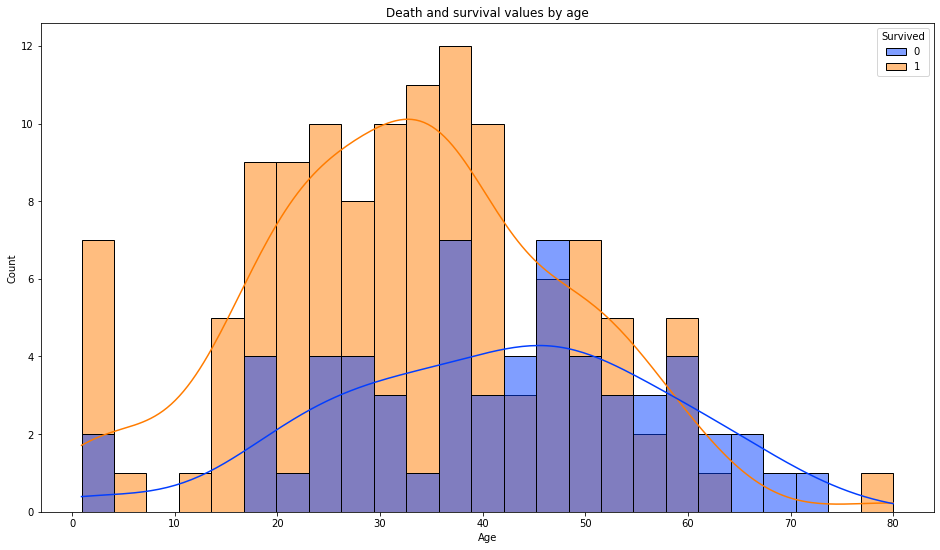

In [163]:
fig, ax1 = plt.subplots(figsize=(16, 9))
sns.set_palette('bright')
sns.histplot(data = Titanic_train, x='Age', ax=ax1, bins=25, hue='Survived', kde=True)
plt.title('Death and survival values by age')
plt.show()

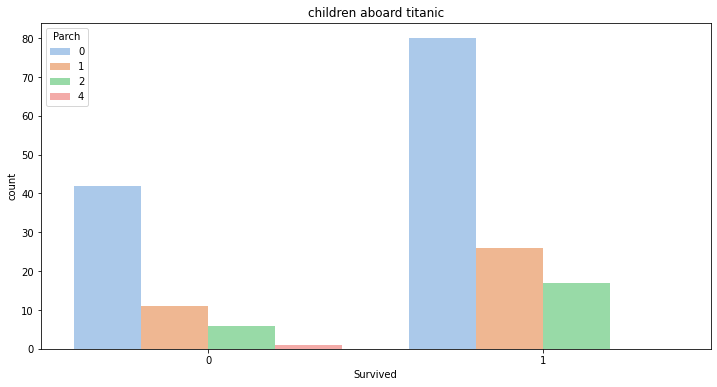

In [165]:
sns.set_palette('pastel')
plt.figure(figsize=(12,6))
sns.countplot(x='Survived', hue='Parch', data = Titanic_train)
plt.title('children aboard titanic')
plt.show()

In [119]:
#Print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


In [173]:
#Correlation analysis
corr=Titanic_train.corr()

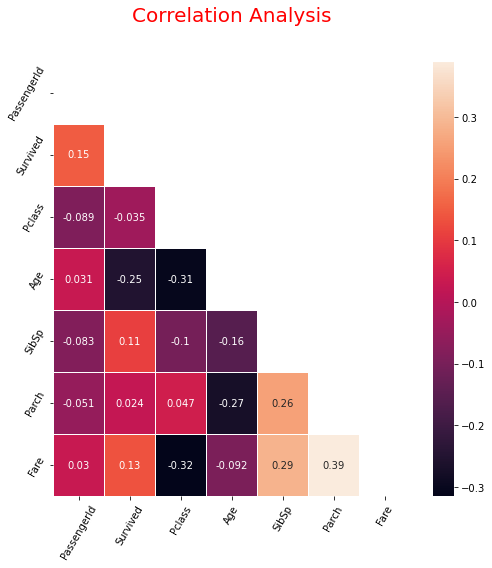

In [175]:
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(Titanic_train.corr(), mask=mask, annot=True, linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

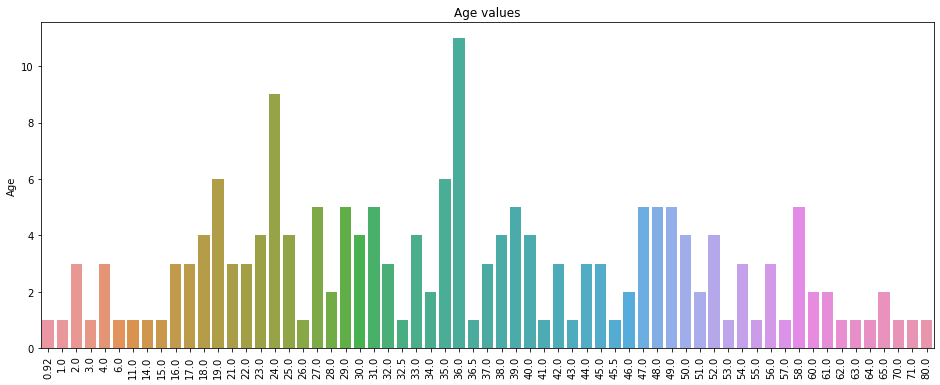

In [178]:
plt.figure(figsize=(16, 6))
sns.barplot(x=Titanic_train['Age'].value_counts().index, y=Titanic_train['Age'].value_counts())
plt.title('Age values')
plt.xticks(rotation=90)
plt.show()

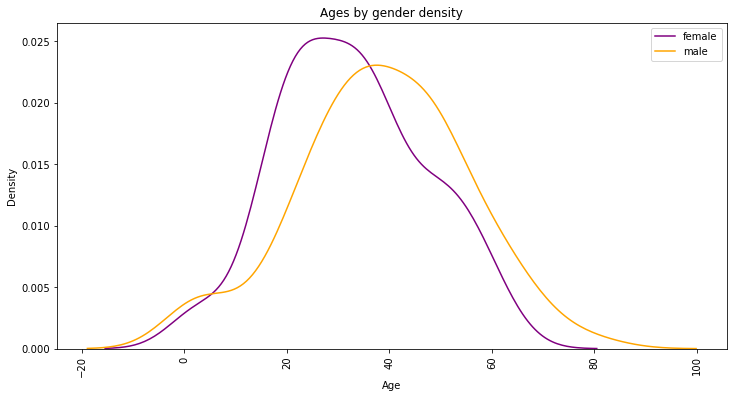

In [179]:
plt.figure(figsize=(12,6))
sns.kdeplot(Titanic_train[Titanic_train['Sex']=='female']['Age'], color='purple', label='female')
sns.kdeplot(Titanic_train[Titanic_train['Sex']=='male']['Age'], color='orange', label='male')
plt.title('Ages by gender density')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [120]:
#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)
#print(labelencoder.fit_transform(titanic.iloc[:,2].values))

#Encode embarked
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)
#print(labelencoder.fit_transform(titanic.iloc[:,7].values))

#Print the NEW unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1 3]


In [121]:
#Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 

In [123]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [181]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [187]:
#After Scaling
pd.DataFrame(X_train, columns=headers).head()

NameError: name 'headers' is not defined